# Домашнее задание 

## Задание № 1. Считаем круги

In [1]:
!git clone https://github.com/aleksei-riabykh/sberbank_data_analysis_06_07_21/  

Cloning into 'sberbank_data_analysis_06_07_21'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 145 (delta 13), reused 7 (delta 7), pack-reused 128
Receiving objects: 100% (145/145), 61.60 MiB | 24.07 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [2]:
import cv2 as cv # pip install opencv-contrib-python
from google.colab.patches import cv2_imshow
import numpy as np # уже знакомые библиотеки
from matplotlib import pyplot as plt
import sys

In [3]:
file_image = '/content/sberbank_data_analysis_06_07_21/data/images/bubbles_2.png'

In [4]:
img = cv.imread(file_image)
# cv2_imshow(img) 

* Посчитать количество кругов на картинке с помощью OpenCV

Найдено:  272 кругов


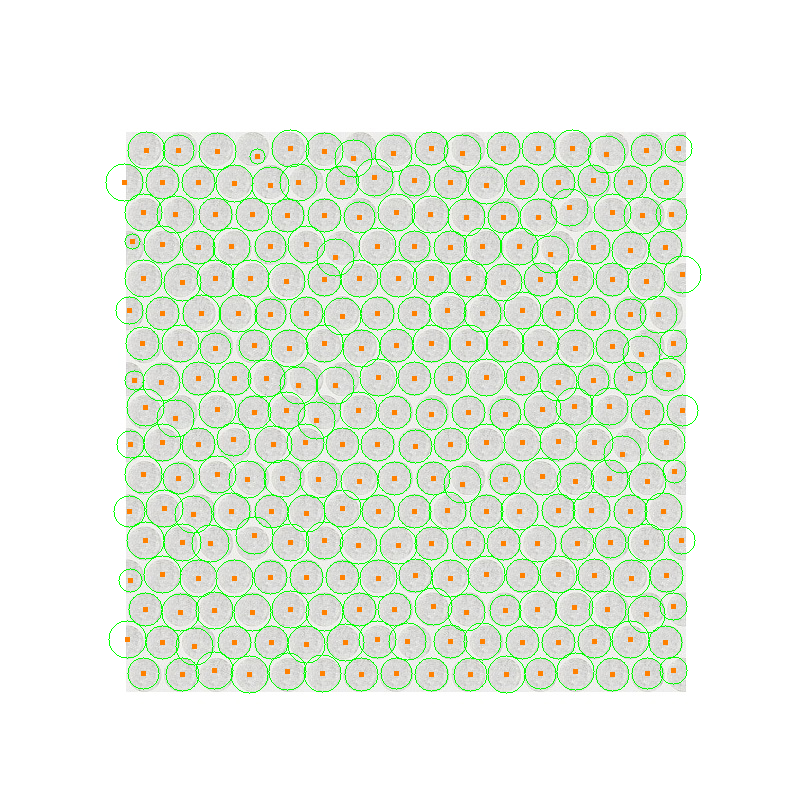

In [5]:
output = img.copy() 
gray =  cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1.6, param2=20, minRadius = 0, maxRadius = 20, minDist = 25) # param1=150, param2 = 20, minRadius = 30, maxRadius = 60

if circles is not None:     
    circles = np.round(circles[0, :]).astype("int") # 

    print('Найдено: ',len(circles), 'кругов')
    for (x, y, r) in circles:  
        cv.circle(output, (x, y), r, (0, 255, 0), 1)
        cv.rectangle(output, (x - 2, y - 2), (x + 2, y + 2), (0, 128, 255), -1)
# dp = 1 : обратный коэффициент разрешения.
# min_dist = gray.rows / 16 : Минимальное расстояние между обнаруженными центрами.
# param_1 = 200 : Верхний порог для внутреннего детектора края Canny.
# param_2 = 100 *: Порог обнаружения центра.
# min_radius = 0 : минимальный радиус для обнаружения. Если неизвестно, по умолчанию укажите ноль.
# max_radius = 0 : максимальный радиус для обнаружения. Если неизвестно, по умолчанию укажите ноль.
    cv2_imshow(output) 
else: print('Кругов нет')

## Задание № 2. Развешиваем картины

* Выделить все картины на фотографии
* Посчитать площадь картин. 
* Подписать площадь каждой картины на фотографии

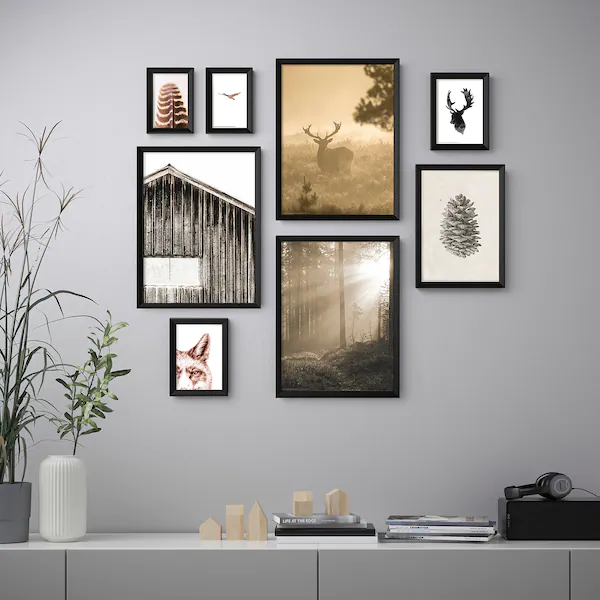

In [6]:
file_image = '/content/sberbank_data_analysis_06_07_21/data/images/pictures_2.jpg'

image = cv.imread(file_image)  # file_image - имя файла, который будем анализировать
cv2_imshow(image)

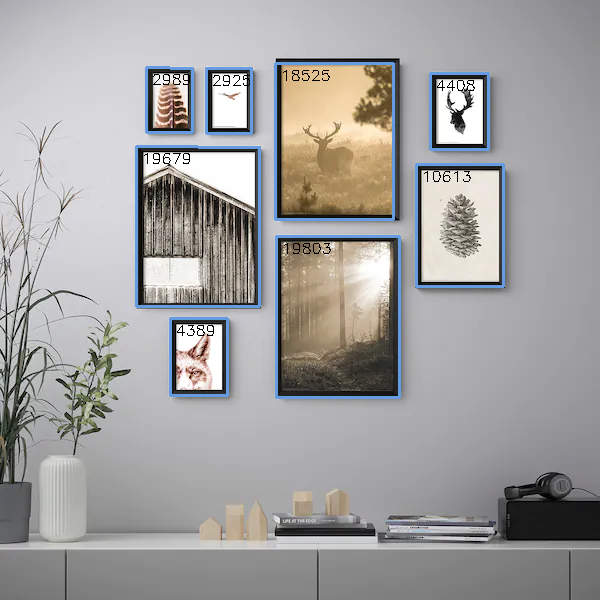

In [79]:
hsv_min = np.array((0, 0, 0), np.uint8)
hsv_max = np.array((50, 220, 80), np.uint8)
fn = file_image 
img = cv.imread(fn)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV) 
thresh = cv.inRange( hsv, hsv_min, hsv_max )
contours0, hierarchy = cv.findContours( thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
for cnt in contours0:
    rect = cv.minAreaRect(cnt)
    box = cv.boxPoints(rect)
    box = np.int0(box)
    area = int(rect[1][0]*rect[1][1])
    if area > 2000 and box[1][1]<400:
        cv.putText(img, str(area), (box[1][0]+5,box[1][1]+17), cv.FONT_HERSHEY_SIMPLEX, .5, (0, 0, 0), 1)
        cv.drawContours(img,[box],0,(225,155,100),2)
cv2_imshow(img)